# Keypoints distance analysis

## Data

Load and prepare data from json

In [12]:
import json
import numpy as np

with open('autob_coco_test.json') as f:
    js_gt = json.load(f)
    
with open('keypoints_out_SBL_autob_test-repo.json') as f:
    js_dt = json.load(f)

dt_ids =  np.array([an['image_id'] for an in js_dt])
dt_kps =  np.array([[an["keypoints"][0::3], an["keypoints"][1::3]] for an in js_dt])
dt_kps = dt_kps.swapaxes(1, 2)

gt_dict = dict([an['image_id'], an['keypoints']] for an in js_gt['annotations'])
gt_kps = np.array([[gt_dict[id][0::3], gt_dict[id][1::3]] for id in dt_ids])
gt_kps = gt_kps.swapaxes(1, 2)

Compute distances d2 defined as $d^2(kp) = (x_{dt}(kp) - x_{gt}(kp))^2 +  (y_{dt}(kp) - y_{gt}(kp))^2$

In [19]:
d2 = np.sum((gt_kps - dt_kps)**2, axis=2)

Preserve only distance with actual annotation ($x$ or $y$ $>0$)

In [30]:
d2_nnz = d2[gt_kps[:,:,0] * gt_kps[:,:,1]> 0]

## Analysis

Compute stats

In [33]:
print(f'mean:{d2_nnz.mean()}, std:{np.std(d2_nnz, ddof=1)}')
print(f'min:{d2_nnz.min()}, median:{np.median(d2_nnz)}, max:{d2_nnz.max()}')

mean:3666.890575143888, std:11206.164522261512
min:0.000885009765625, median:446.74806213378906, max:280277.30667792447


Disp histogram

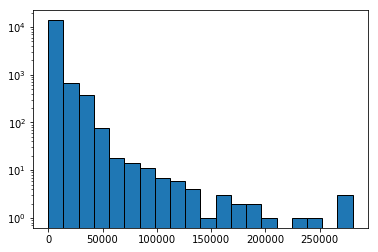

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(d2_nnz, bins=20, histtype='bar', ec='black')
plt.gca().set_yscale("log")
plt.show()